In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm

### Geometric Brownian Motion simmlation with stochastic process modeling

In [49]:
trading_days_in_year = 50
T = 1.0
steps = int(T * trading_days_in_year)
path_count = 2**10
s0 = 100
r = 0.1
sigma = 0.2


In [50]:
dt = T / steps
shocks = np.random.normal(0, 1, (path_count, steps))
paths = np.zeros((path_count, steps + 1))
paths[:, 0] = s0
for i in range(1, steps + 1):
    paths[:, i] = paths[:, i - 1] + paths[:, i - 1] * r * dt + sigma * paths[:, i - 1] * np.sqrt(dt) * shocks[:, i - 1]


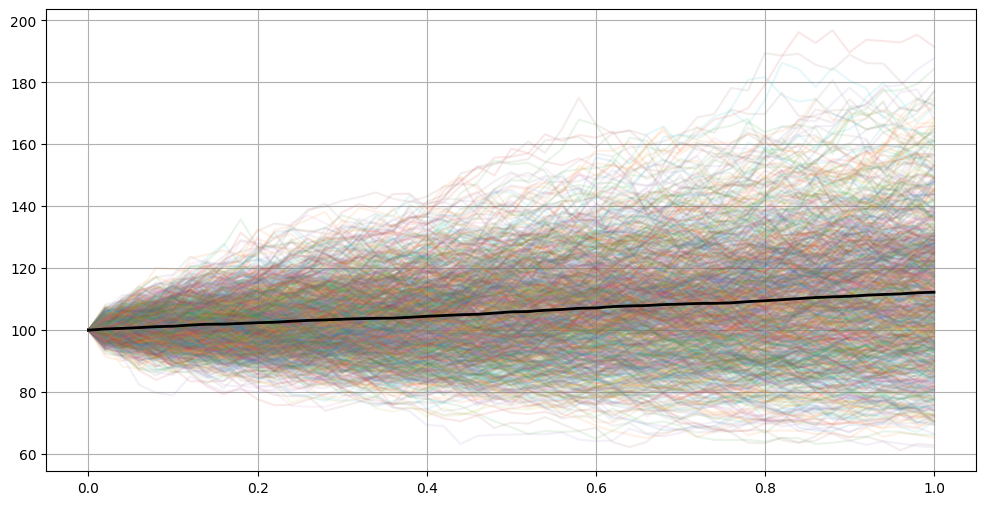

In [51]:
x_axis = np.linspace(0, T, steps + 1)
plt.figure(figsize=(12, 6))
plt.plot(x_axis, paths.T, alpha=0.1)
plt.plot(x_axis, np.mean(paths, axis=0), color='black', linewidth=2, label='Mean Path')
# plt.legend()  # adding legend doubles execution time
plt.grid(True)
plt.show()


4.628680804494973 0.0981923196748695
4.652332454315449 0.1416900331000966
4.6734418117083605 0.17163338502429307
4.700503807801615 0.2014347781264449


[]

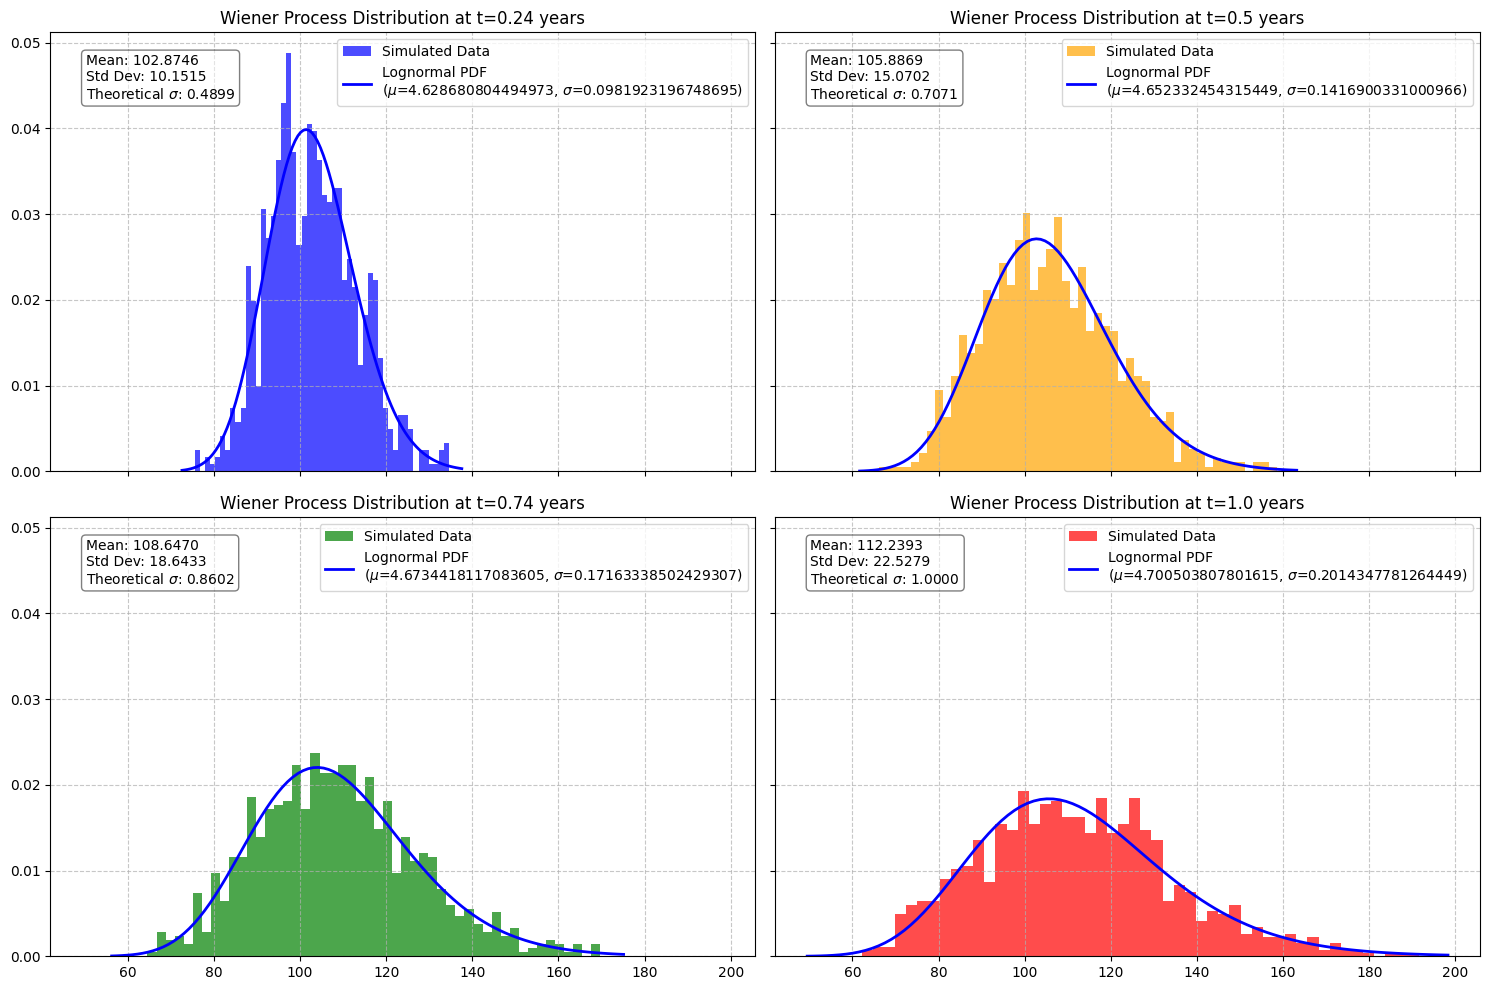

In [52]:
indicies = [int(steps / 4), int(steps / 2), int(3 * steps / 4), steps]
titles = [f'Wiener Process Distribution at t={np.round(ind / trading_days_in_year, 2)} years' for ind in indicies]
colors = ['blue', 'orange', 'green', 'red']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    idx = indicies[i]
    data = paths.T[idx, :]
        
    ax.hist(data, bins=50, color=colors[i], alpha=0.7, density=True, label='Simulated Data')

    # A critical detail when using scipy.stats.lognorm is its parametrization: 
    # Shape parameter: This corresponds to the standard deviation sigma of the logarithm
    # Scale parameter: This corresponds to exp(mu), where mu is the mean of the logarithm.
    mu = np.log(paths.T[idx, :]).mean()  # TODO: more info regarding lognormal distribution
    sigma = np.log(paths.T[idx, :]).std()
    print(mu, sigma)

    dist = lognorm(s=sigma, scale=np.exp(mu))
    x_range = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 100)
    pdf = dist.pdf(x_range)

    ax.plot(x_range, pdf, 'b-', lw=2, label=f'Lognormal PDF\n($\mu$={mu}, $\sigma$={sigma})')
    ax.grid(True, linestyle='--', alpha=0.7)
        
    stats_text = (f'Mean: {data.mean():.4f}\n'
                  f'Std Dev: {data.std():.4f}\n'
                  f'Theoretical $\sigma$: {np.sqrt(idx / trading_days_in_year):.4f}')  # TODO: more relevant info
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()
plt.plot()

In [ ]:
# Parameters of normal distribution for logarithm of prices, TODO: check if correct
norm_mu = sigma ** 2 * ( (steps / 4) / trading_days_in_year )
norm_sigma = np.log(s0) + (r - (sigma**2 / 2)) * np.round((steps / 4) / trading_days_in_year, 2)

np.float64(0.01014399245971252)